# Plots

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from helper import *
%matplotlib inline

In [9]:
def plotFile(filename, i, maxElements=None):
    data = np.array(readFromFile(filename))
    #
    #plt.figure()
    
    plt.subplot(3, 2, i + 1)
    if maxElements is not None:
        dataToPlot = data[:maxElements]
    else:
        dataToPlot = data
        
    plt.plot(np.arange(len(dataToPlot)), dataToPlot, )
    plt.ylim([0, 200])
    return data

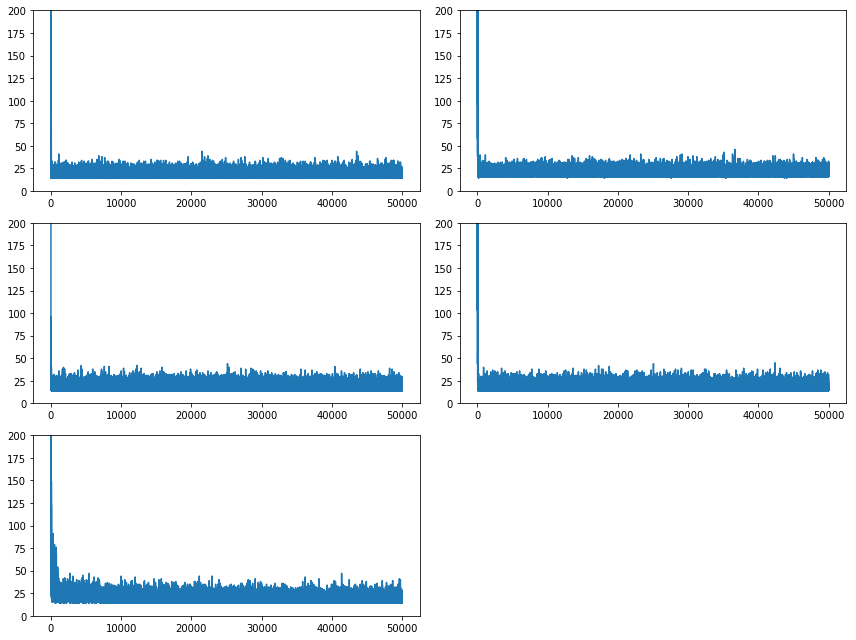

In [10]:
plt.figure(figsize=(12, 9))
numberOfSteps = plotFile("results/numberOfSteps_Q-Learning.json", 0)
numberOfSteps = plotFile("results/numberOfSteps_SARSA.json", 1)
numberOfSteps = plotFile("results/numberOfSteps_Actor-Critic.json", 2)
numberOfSteps = plotFile("results/numberOfSteps_QV-Learning.json", 3)
numberOfSteps = plotFile("results/numberOfSteps_ACLA.json", 4)
plt.tight_layout()

In [11]:
rewards = np.array(readFromFile("results/allRewardsIntakes_Q-Learning.json"))
len(rewards)
rewards[2499:-2500:2500].sum() / 20
91.1 / 20

4.555

In [12]:
numberOfSteps.min()

14.0

In [13]:
allRewardsIntakes = plotFile("allRewardsIntakes_QLearning.json")

TypeError: plotFile() missing 1 required positional argument: 'i'

# Experiment 1 

## Single Algorithms 

In [40]:
data = readComplexJson("resultsSingleAlgorithm.json")

In [41]:
algorithms = ["Q-Learning", "SARSA", "Actor-Critic", "QV-Learning", "ACLA"]
finalRes_single = {algo: {"mean": 0, "std": 0} for algo in algorithms}
cumulRes_single = {algo: {"mean": 0, "std": 0} for algo in algorithms}

res_single = {algo: {"final": 0, "cumul": 0} for algo in algorithms}

for algo in algorithms:
    final = [data[key][0] for key in data if key[0] == algo]
    cumul = [data[key][1] for key in data if key[0] == algo]
    
    finalRes_single[algo]["mean"] = np.mean(final)
    finalRes_single[algo]["std"] = np.std(final)
    
    cumulRes_single[algo]["mean"] = np.mean(cumul)
    cumulRes_single[algo]["std"] = np.std(cumul)
    
print("Final results")
print(json.dumps(finalRes_single, indent=3))
print("Cumul results")
print(json.dumps(cumulRes_single, indent=3))

Final results
{
   "Actor-Critic": {
      "std": 0.12011959085812902,
      "mean": 4.855568944714282
   },
   "QV-Learning": {
      "std": 0.1326231753090119,
      "mean": 4.850565863019696
   },
   "SARSA": {
      "std": 0.17607735820859782,
      "mean": 4.838936771423959
   },
   "Q-Learning": {
      "std": 0.16949001236863268,
      "mean": 4.832716359683658
   },
   "ACLA": {
      "std": 0.4233245482025311,
      "mean": 4.747155608410631
   }
}
Cumul results
{
   "Actor-Critic": {
      "std": 5.468177109500854,
      "mean": 96.92020197128467
   },
   "QV-Learning": {
      "std": 5.476687961147748,
      "mean": 97.12186157345826
   },
   "SARSA": {
      "std": 6.041052927070389,
      "mean": 97.27421329688295
   },
   "Q-Learning": {
      "std": 5.862467573202897,
      "mean": 96.99146889271204
   },
   "ACLA": {
      "std": 10.603909191538563,
      "mean": 90.99300749598687
   }
}


## Ensemble Methods 

In [42]:
data = readComplexJson("resultsEnsemble.json")

ensembles = ["Majority", "Rank", "Boltzmann Addition", "Boltzmann Multiplication"]
finalRes_ensembles = {algo: {"mean": 0, "std": 0} for algo in ensembles}
cumulRes_ensembles = {algo: {"mean": 0, "std": 0} for algo in ensembles}

for algo in ensembles:
    final = [data[key][0] for key in data if key[0] == algo]
    cumul = [data[key][1] for key in data if key[0] == algo]
    
    finalRes_ensembles[algo]["mean"] = np.mean(final)
    finalRes_ensembles[algo]["std"] = np.std(final)
    
    cumulRes_ensembles[algo]["mean"] = np.mean(cumul)
    cumulRes_ensembles[algo]["std"] = np.std(cumul)
    
print("Final results")
print(json.dumps(finalRes_ensembles, indent=3))
print("Cumul results")
print(json.dumps(cumulRes_ensembles, indent=3))

Final results
{
   "Boltzmann Addition": {
      "std": 0.034976304816175904,
      "mean": 4.844699580055158
   },
   "Rank": {
      "std": 0.08728829244051106,
      "mean": 4.845236812920206
   },
   "Majority": {
      "std": 0.16440224647780805,
      "mean": 4.810288611150387
   },
   "Boltzmann Multiplication": {
      "std": 0.6781960582705131,
      "mean": 4.260474036707816
   }
}
Cumul results
{
   "Boltzmann Addition": {
      "std": 4.823815751765192,
      "mean": 96.8367281526274
   },
   "Rank": {
      "std": 5.1962179953239165,
      "mean": 95.91227582892031
   },
   "Majority": {
      "std": 6.034274720436644,
      "mean": 93.41133910501513
   },
   "Boltzmann Multiplication": {
      "std": 12.571040542952707,
      "mean": 78.11573728949108
   }
}


([<matplotlib.axis.XTick at 0x7f21d79177f0>,
 <a list of 9 Text xticklabel objects>)

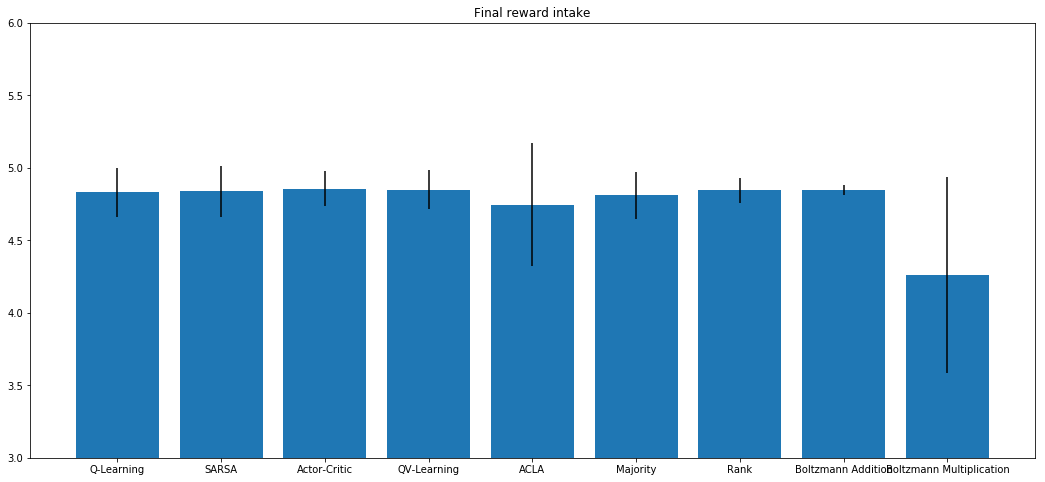

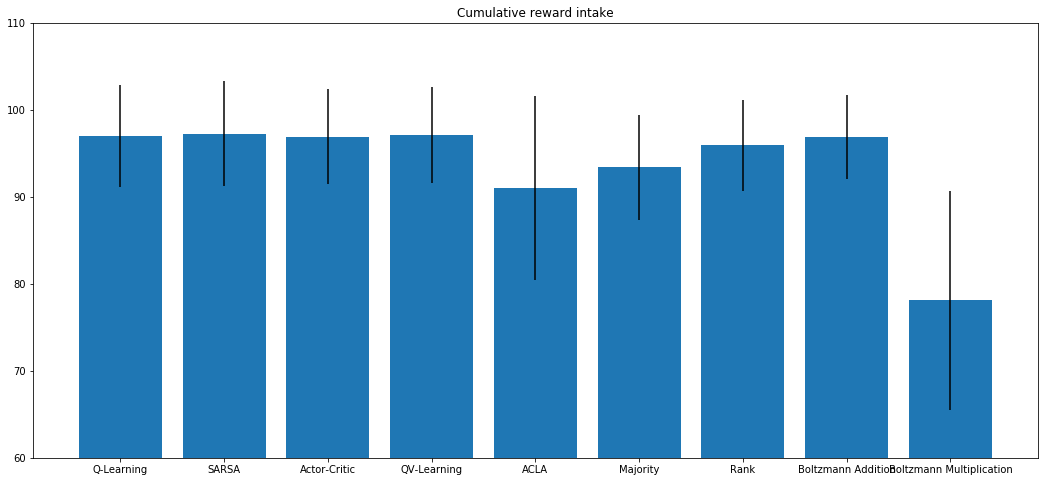

In [68]:
algos = algorithms + ensembles

all_res_final = dict(finalRes_single)
all_res_final.update(finalRes_ensembles)

res_final_mean = [all_res_final[algo]["mean"] for algo in algos]
res_final_std = [all_res_final[algo]["std"] for algo in algos]

plt.figure(figsize=(18,8))
plt.title("Final reward intake")
plt.ylim(3,6)
plt.bar([i for i in range(len(algos))], res_final_mean, yerr=res_final_std)
plt.xticks([i for i in range(len(algos))],algos)

all_res_cumul = dict(cumulRes_single)
all_res_cumul.update(cumulRes_ensembles)

res_cumul_mean = [all_res_cumul[algo]["mean"] for algo in algos]
res_cumul_std = [all_res_cumul[algo]["std"] for algo in algos]

plt.figure(figsize=(18,8))
plt.title("Cumulative reward intake")
plt.ylim(60, 110)
plt.bar([i for i in range(len(algos))], res_cumul_mean, yerr=res_cumul_std)
plt.xticks([i for i in range(len(algos))],algos)